# Lab | Random Forests

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
targets = pd.read_csv('target.csv')
targets.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [3]:
numerical = pd.read_csv('numerical.csv')
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [4]:
categorical = pd.read_csv('categorical.csv')
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [5]:
encoded_categorical = pd.get_dummies(categorical, drop_first=True)

In [6]:
all_data = pd.concat((encoded_categorical,numerical,targets),axis=1)


In [7]:
all_data.head()

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,36,3,2,89,1,37,12,92,8,94,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,14,3,1,94,1,52,2,93,10,95,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,43,3,2,90,1,0,2,91,11,92,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,44,3,2,87,1,28,1,87,11,94,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,16,3,2,86,1,20,1,93,10,96,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0


In [8]:
donations_data = all_data[all_data['TARGET_B']==1]
X = donations_data.drop(columns=['TARGET_B','TARGET_D'])
y = donations_data['TARGET_D']

In [9]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=30, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=30, verbose=False)

In [10]:
# After we run the algorithm, it labels the top features as 1 and the rest are marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
top_30=df[df['Rank']==1]
#df['Rank'].value_counts()

In [11]:
top_30

,Rank,Column_name
16,1,STATE_GA
20,1,STATE_MO
22,1,STATE_TX
24,1,STATE_WI
26,1,HOMEOWNR_U
27,1,GENDER_M
29,1,RFA_2A_E
30,1,RFA_2A_F
31,1,RFA_2A_G
34,1,GEOCODE2_D


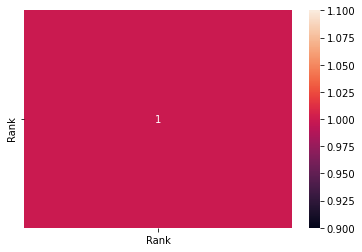

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
correllation_matrix = df.corr()
sns.heatmap(correllation_matrix,annot=True)
plt.show()

In [ ]:
targets['TARGET_D'].value_counts()

In [ ]:
data_B = all_data.drop(['TARGET_B'], axis=1)
data_B.head()

In [ ]:
from sklearn.utils import resample

category_0 = data_B[data_B['TARGET_B'] == 0]
category_1 = data_B[data_B['TARGET_B'] == 1]

In [ ]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [ ]:
category_1_oversampled

In [ ]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [ ]:
data_upsampled['TARGET_B'].value_counts()

In [ ]:
X1=data_upsampled.drop(['TARGET_B'],axis=1)
y1=data_upsampled['TARGET_B']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'mse',
                             min_samples_split=7,
                             min_samples_leaf = 2,
                             max_features = 4)
model = regr.fit(X_train, y_train)
print("test data accuracy was: ",regr.score(X_test, y_test))
print("train data accuracy was: ",regr.score(X_train, y_train))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


max_depth_choices= [3,4,5,6,7,8,9,10,None]
criterion_choices = ['mse','mae']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
max_features_choices = [2,3,4,5,6]

random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [ ]:
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 10)

In [ ]:
random_search

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_score_